<a href="https://colab.research.google.com/github/mleyvaz/ejemplo/blob/main/Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

Librrrias

In [ ]:
dataset = pd.read_excel("tempearatura.xlsx")

# Analisis exploratorio de datos

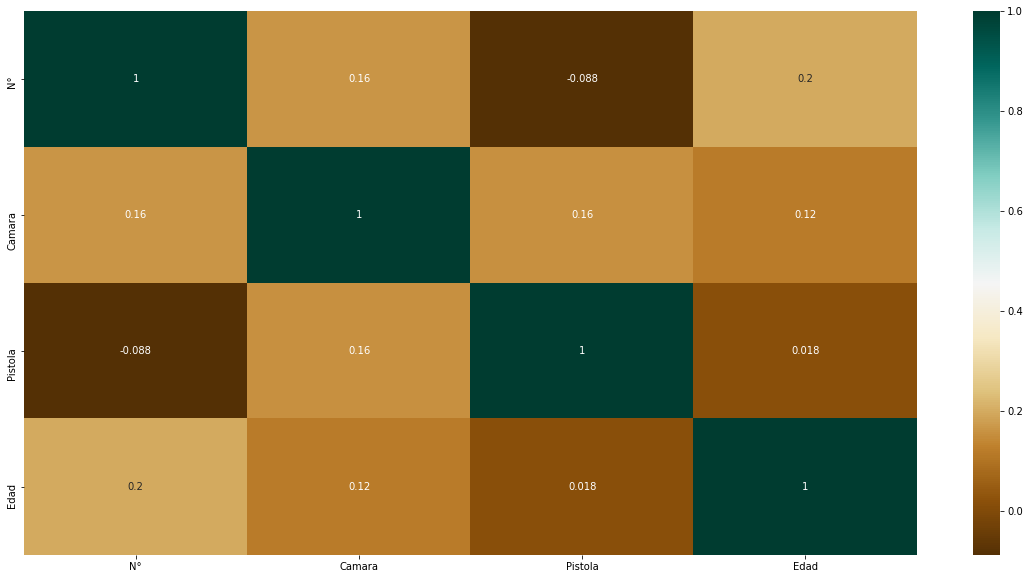

In [ ]:

plt.figure(figsize=(20,10))
c= dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)


# Test de Normalidad

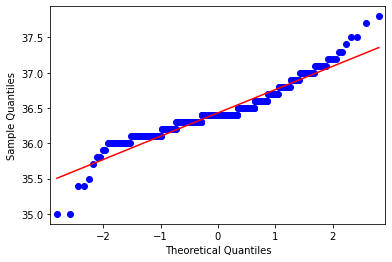

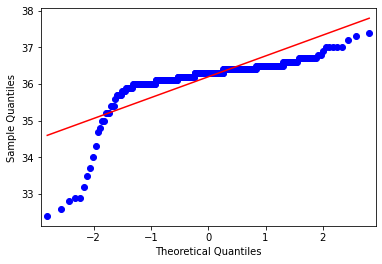

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dataset['Camara'], line='s')

qqplot(dataset['Pistola'], line='s')
plt.show()

In [ ]:
stat, p = stats.shapiro(dataset['Camara'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

3.196270017321451e-13
H1  La muestra no sigue una distribución normal


Prueba de hipotesos

In [ ]:
stat, p = stats.shapiro(dataset['Pistola'])
# interpret
print(p)
alpha = 0.05
if p > alpha:
	print('0 La muestra sigue una distribución normal')
else:
	print('H1  La muestra no sigue una distribución normal')

9.19173613461644e-30
H1  La muestra no sigue una distribución normal


Prueba de hipótesis en python

|       |  | Pruebas Paramétricas     | Pruebas No Paramétricas  |
| ----------- | ----------- | ----------- | ----------- |
| Muestras Independientes     | Múltiples muestras | Anova     |  Kruskal-Wallis|
|       | Dos Muestras| t de Student      | U Mann Whitney |
| Muestras Dependientes      | Múltiples muestras | ANOVA de dos vías      | Friedman |
|      | Dos Muestras | Prueba t dependiente      | Wilcoxson |

Dos muestras dependientes , pruebas no parametricas
Wilcoxson

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

stat, p = wilcoxon(dataset['Pistola'],dataset['Camara'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=14318.500, p=0.000
Probably different distributions
